# Manual Segmentation Analysis

This code takes images and OAR manual segmentation masks (from 3 observers for a subset of 5 OPC cases) from the ground-truth 6-minute and synthetic 6-minute and performs various analyses relevant for the manuscript. Specifically, the code generates plots that are used in to replicate Figure 4 of the manuscript and associated results. 

There are 2 main parts of this analysis:
1. Direct comparisons of segmentations.
2. Interobserver variability studies with relevant statistics.

Last updated: October 6, 2022 by Kareem Wahid. 

## Dependencies

In [29]:
import os 
from DicomRTTool.ReaderWriter import DicomReaderWriter # pip install DicomRTTool

import re
import SimpleITK as sitk

import pandas as pd

from surface_distance import compute_surface_distances, compute_surface_dice_at_tolerance, compute_dice_coefficient, compute_average_surface_distance, compute_robust_hausdorff

In [249]:
%config InlineBackend.figure_format='retina' # for high quality plot

## Generate NIfTI files

In [25]:
# first read in files make sure everything is there 

base_path = "C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\DICOM_conversion_testing"

out_path = "C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti"

MRN_paths = [os.path.join(base_path, folder) for folder in os.listdir(base_path)]

for MRN_path in MRN_paths:
    print(MRN_path)
    
    MRN = os.path.split(MRN_path)[-1]
    
    # create the path if it doesn't exist 
    out_MRN_path = os.path.join(out_path, MRN)
    if not os.path.exists(out_MRN_path):
        os.mkdir(out_MRN_path)
    
    sub_paths = [os.path.join(MRN_path, folder) for folder in os.listdir(MRN_path)]
    
    for sub_path in sub_paths:
        print(sub_path)
        
        sub = os.path.split(sub_path)[-1].lower()
        
        print(sub)
        
        Dicom_reader = DicomReaderWriter(description='Examples', series_instances_dictionary = {}) # instantiate
        Dicom_reader.walk_through_folders(sub_path)
        all_rois = Dicom_reader.return_rois(print_rois=True)
        
        ma_rois = [roi for roi in all_rois if roi.endswith("_ma")]
        de_rois = [roi for roi in all_rois if roi.endswith("_de")]
        yk_rois = [roi for roi in all_rois if roi.endswith("_yk") or roi.endswith('-yk')] # yomna had one that used - instead of _ 
        
        print("ma count = ", len(ma_rois))
        print("de count = ", len(de_rois))
        print("yk count = ", len(yk_rois))
        
        Dicom_reader.get_images()
        image = Dicom_reader.ArrayDicom # image array
        dicom_sitk_handle = Dicom_reader.dicom_handle # SimpleITK image handle
        #sitk.WriteImage(dicom_sitk_handle, os.path.join(out_MRN_path, 'image_' + sub + '.nii.gz'))
        
        for num, roi in enumerate(all_rois):
            
            print(roi)
            
            Contour_Names = [roi]
            
            if roi.endswith('_ma'):
                observer = 'ma'
                if "bone_mandible" in roi: # hard code to account for bone mandible 
                    roi_name = 'bone_mandible'
                else:
                    roi_name = roi.split('_ma')[0]
            elif roi.endswith('_de'):
                observer = 'de'
                roi_name = roi.split('_de')[0]
            elif roi.endswith("_yk") or roi.endswith('-yk'):
                observer = 'yk'
                roi_name = re.split('_yk|-yk', roi)[0]
                
            print(roi_name, observer)
            
            Dicom_reader.set_contour_names_and_associations(Contour_Names=Contour_Names)
            Dicom_reader.get_images_and_mask()
            mask = Dicom_reader.mask # mask array
            mask_sitk_handle = Dicom_reader.annotation_handle # SimpleITK mask handle
            #sitk.WriteImage(mask_sitk_handle, os.path.join(out_MRN_path, roi_name + '_' + sub + '_' + observer + '.nii.gz'))

C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Real
real


Loading through DICOM files:   0%|                                                               | 0/4 [00:00<?, ?it/s]

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Real\DE
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Real\YK
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Real
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Real\MA


Loading through DICOM files: 100%|███████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.95s/it]


Compiling dictionaries together...
Index 0, description None at C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Real
1 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
spinalcord_yk
brainstem_yk
bone_mandible_yk
glnd_submand_l_yk
glnd_submand_r_yk
parotid_l_yk
parotid_r_yk
glnd_submand_l_de
gland_submand_r_de
bone_mandible_de
parotid_r_de
parotid_l_de
brainstem_de
spinalcord_de
bone_mandible_ma
spinalcord_ma
parotid_r_ma
gland_submand_r_ma
gland_submand_l_ma
brainstem_ma
parotid_l_ma
ma count =  7
de count =  7
yk count =  7
Loading images for None at 
 C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Real

spinalcord_yk
spinalcord yk
brainstem_yk
brainstem yk
bone_mandible_yk
bone_mandible yk
glnd_submand_l_yk
glnd_submand_l yk
glnd_submand_r_yk
glnd_submand_r yk
parotid_l_yk
parotid_l yk
parotid_r_yk
parotid_r yk
glnd_submand_l_de
glnd_submand_l de
gl

Loading through DICOM files:   0%|                                                               | 0/4 [00:00<?, ?it/s]

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Synthetic\MA
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Synthetic\DE
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Synthetic
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Synthetic\YK


Loading through DICOM files: 100%|███████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.27it/s]


Compiling dictionaries together...
Index 0, description  at C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Synthetic
1 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
brainstem_ma
bone_mandible_ma
glnd_submand_l_ma
glnd_submand_r_ma
parotid_l_ma
parotid_r_ma
spinalcord_ma
spinalcord_de
parotid_r_de
parotid_l_de
glnd_submand_r_de
glnd_submand_l_de
brainstem_de
bone_mandible_de
bone_mandible_yk
parotid_l_yk
parotid_r_yk
spinalcord_yk
brainstem_yk
glnd_submand_l_yk
glnd_submand_r_yk
ma count =  7
de count =  7
yk count =  7
Loading images for  at 
 C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\1389864037\Synthetic

brainstem_ma
brainstem ma
bone_mandible_ma
bone_mandible ma
glnd_submand_l_ma
glnd_submand_l ma
glnd_submand_r_ma
glnd_submand_r ma
parotid_l_ma
parotid_l ma
parotid_r_ma
parotid_r ma
spinalcord_ma
spinalcord ma
spinalcord_de
spinalcord de
parotid_r_d

Loading through DICOM files:   0%|                                                               | 0/4 [00:00<?, ?it/s]

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Real\MALoading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Real\YK
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Real\DE

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Real


Loading through DICOM files: 100%|███████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.25s/it]


Compiling dictionaries together...
Index 0, description None at C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Real
1 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
gland_submand_r_de
gland_submand_l_de
bone_mandible_de
parotid_r_de
parotid_l_de
brainstem_de
spinalcord_de
glnd_submand_r_ma
glnd_submand_l_ma
bone_mandible_ma
brainstem_ma
parotid_r_ma
parotid_l_ma
spinalcord_ma
glnd_submand_l_yk
glnd_submand_r_yk
bone_mandible_yk
parotid_l_yk
parotid_r_yk
spinalcord_yk
brainstem_yk
ma count =  7
de count =  7
yk count =  7
Loading images for None at 
 C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Real

gland_submand_r_de
gland_submand_r de
gland_submand_l_de
gland_submand_l de
bone_mandible_de
bone_mandible de
parotid_r_de
parotid_r de
parotid_l_de
parotid_l de
brainstem_de
brainstem de
spinalcord_de
spinalcord de
glnd_submand_r_ma
glnd_submand_r ma

Loading through DICOM files:   0%|                                                               | 0/4 [00:00<?, ?it/s]

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Synthetic\MA
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Synthetic\YK
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Synthetic\DE
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Synthetic


Loading through DICOM files: 100%|███████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.71it/s]


Compiling dictionaries together...
Index 0, description  at C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Synthetic
1 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
glnd_submand_l_yk
glnd_submand_r_yk
bone_mandible_yk
parotid_l_yk
parotid_r_yk
spinalcord_yk
brainstem_yk
bone_mandible_ma
brainstem_ma
gland_submand_l_ma
gland_submand_r_ma
parotid_l_ma
parotid_r_ma
spinalcord_ma
gland_submand_r_de
gland_submand_l_de
bone_mandible_de
parotid_r_de
parotid_l_de
brainstem_de
spinalcord_de
ma count =  7
de count =  7
yk count =  7
Loading images for  at 
 C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\2589026023\Synthetic

glnd_submand_l_yk
glnd_submand_l yk
glnd_submand_r_yk
glnd_submand_r yk
bone_mandible_yk
bone_mandible yk
parotid_l_yk
parotid_l yk
parotid_r_yk
parotid_r yk
spinalcord_yk
spinalcord yk
brainstem_yk
brainstem yk
bone_mandible_ma
bone_mandible ma
b

Loading through DICOM files:   0%|                                                               | 0/4 [00:00<?, ?it/s]

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Real
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Real\YK
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Real\DE
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Real\MA


Loading through DICOM files: 100%|███████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.33s/it]


Compiling dictionaries together...
Index 0, description None at C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Real
1 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
parotid_r_yk
spinalcord_yk
brainstem_yk
bone_mandible_yk
glnd_submand_l_yk
glnd_submand_r_yk
parotid_l_yk
bone_mandible_de
gland_submand_r_de
gland_submand_l_de
parotid_r_de
parotid_l_de
brainstem_de
spinalcord_de
bone_mandible_ma
brainstem_ma
spinalcord_ma
glnd_submand_l_ma
glnd_submand_r_ma
parotid_l_ma
parotid_r_ma
ma count =  7
de count =  7
yk count =  7
Loading images for None at 
 C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Real

parotid_r_yk
parotid_r yk
spinalcord_yk
spinalcord yk
brainstem_yk
brainstem yk
bone_mandible_yk
bone_mandible yk
glnd_submand_l_yk
glnd_submand_l yk
glnd_submand_r_yk
glnd_submand_r yk
parotid_l_yk
parotid_l yk
bone_mandible_de
bone_mandible de
gland

Loading through DICOM files:   0%|                                                               | 0/4 [00:00<?, ?it/s]

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Synthetic\MA
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\SyntheticLoading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Synthetic\YKLoading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Synthetic\DE




Loading through DICOM files: 100%|███████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.58it/s]


Compiling dictionaries together...
Index 0, description  at C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Synthetic
1 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
bone_mandible_de
gland_submand_r_de
gland_submand_l_de
parotid_r_de
parotid_l_de
brainstem_de
spinalcord_de
spinalcord_ma
parotid_r_ma
parotid_l_ma
gland_submand_r_ma
gland_submand_l_ma
brainstem_ma
bone_mandible_ma
glnd_submand_l_yk
glnd_submand_r_yk
bone_mandible_yk
parotid_l_yk
parotid_r_yk
spinalcord_yk
brainstem_yk
ma count =  7
de count =  7
yk count =  7
Loading images for  at 
 C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3244262639\Synthetic

bone_mandible_de
bone_mandible de
gland_submand_r_de
gland_submand_r de
gland_submand_l_de
gland_submand_l de
parotid_r_de
parotid_r de
parotid_l_de
parotid_l de
brainstem_de
brainstem de
spinalcord_de
spinalcord de
spinalcord_ma
spinalcord ma
par

Loading through DICOM files:   0%|                                                               | 0/4 [00:00<?, ?it/s]

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Real\DELoading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Real
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Real\YK

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Real\MA


Loading through DICOM files: 100%|███████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.46s/it]


Compiling dictionaries together...
Index 0, description None at C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Real
1 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
bone_mandible_de
parotid_r_de
parotid_l_de
gland_submand_l_de
gland_submand_r_de
brainstem_de
spinalcord_de
spinalcord_ma
brainstem_ma
bone_mandible_ma
glnd_submand_l_ma
glnd_submand_r_ma
parotid_l_ma
parotid_r_ma
glnd_submand_l_yk
glnd_submand_r_yk
bone_mandible_yk
parotid_l_yk
parotid_r_yk
spinalcord_yk
brainstem_yk
ma count =  7
de count =  7
yk count =  7
Loading images for None at 
 C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Real

bone_mandible_de
bone_mandible de
parotid_r_de
parotid_r de
parotid_l_de
parotid_l de
gland_submand_l_de
gland_submand_l de
gland_submand_r_de
gland_submand_r de
brainstem_de
brainstem de
spinalcord_de
spinalcord de
spinalcord_ma
spinalcord ma
brainst

Loading through DICOM files:   0%|                                                               | 0/4 [00:00<?, ?it/s]

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Synthetic
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Synthetic\MA
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Synthetic\DE
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Synthetic\YK


Loading through DICOM files: 100%|███████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.59it/s]


Compiling dictionaries together...
Index 0, description  at C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Synthetic
1 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
brainstem_ma
spinalcord_ma
glnd_submand_l_ma
glnd_submand_r_ma
parotid_l_ma
parotid_r_ma
bone_mandible_ma
bone_mandible_de
parotid_r_de
parotid_l_de
gland_submand_r_de
gland_submand_l_de
brainstem_de
spinalcord_de
glnd_submand_l_yk
glnd_submand_r_yk
bone_mandible_yk
parotid_l_yk
parotid_r_yk
spinalcord_yk
brainstem_yk
ma count =  7
de count =  7
yk count =  7
Loading images for  at 
 C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3376859407\Synthetic

brainstem_ma
brainstem ma
spinalcord_ma
spinalcord ma
glnd_submand_l_ma
glnd_submand_l ma
glnd_submand_r_ma
glnd_submand_r ma
parotid_l_ma
parotid_l ma
parotid_r_ma
parotid_r ma
bone_mandible_ma
bone_mandible ma
bone_mandible_de
bone_mandible de
par

Loading through DICOM files:   0%|                                                               | 0/4 [00:00<?, ?it/s]

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Real\DELoading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Real
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Real\YK

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Real\MA


Loading through DICOM files: 100%|███████████████████████████████████████████████████████| 4/4 [00:19<00:00,  4.85s/it]


Compiling dictionaries together...
Index 0, description None at C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Real
1 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
parotid_r_de
parotid_l_de
gland_submand_r_de
bone_mandible_de
gland_submand_l_de
brainstem_de
spinalcord_de
bone_mandible_ma
parotid_r_ma
parotid_l_ma
brainstem_ma
spinalcord_ma
glnd_submand_l_ma
glnd_submand_r_ma
parotid_l_yk
parotid_r_yk
spinalcord_yk
brainstem_yk
bone_mandible_yk
glnd_submand_l_yk
glnd_submand_r_yk
ma count =  7
de count =  7
yk count =  7
Loading images for None at 
 C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Real

parotid_r_de
parotid_r de
parotid_l_de
parotid_l de
gland_submand_r_de
gland_submand_r de
bone_mandible_de
bone_mandible de
gland_submand_l_de
gland_submand_l de
brainstem_de
brainstem de
spinalcord_de
spinalcord de
bone_mandible_ma
bone_mandible ma
p

Loading through DICOM files:   0%|                                                               | 0/4 [00:00<?, ?it/s]

Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Synthetic
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Synthetic\MA
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Synthetic\DE
Loading from C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Synthetic\YK


Loading through DICOM files: 100%|███████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.63it/s]


Compiling dictionaries together...
Index 0, description  at C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Synthetic
1 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
bone_mandible_de
parotid_r_de
parotid_l_de
gland_submand_r_de
gland_submand_l_de
brainstem_de
spinalcord_de
bone_mandible_ma
brainstem_ma
glnd_submand_l_ma
glnd_submand_r_ma
parotid_l_ma
parotid_r_ma
spinalcord_ma
glnd_submand_l_yk
glnd_submand_r-yk
bone_mandible_yk
parotid_l_yk
parotid_r_yk
spinalcord_yk
brainstem_yk
ma count =  7
de count =  7
yk count =  7
Loading images for  at 
 C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\DICOM_conversion_testing\3641355426\Synthetic

bone_mandible_de
bone_mandible de
parotid_r_de
parotid_r de
parotid_l_de
parotid_l de
gland_submand_r_de
gland_submand_r de
gland_submand_l_de
gland_submand_l de
brainstem_de
brainstem de
spinalcord_de
spinalcord de
bone_mandible_ma
bone_mandible ma

In [34]:
# rename some outlier files 

nifti_path = "C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti"

for root, dirs, files in os.walk(nifti_path):
    for f in files:
        f_path = os.path.join(root, f)
        
        if "gland" in f:
            print(f_path)
            
            f_path_new = f_path.replace("gland", "glnd")
            
            print(f_path_new)
            
            #os.rename(f_path, f_path_new)

C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\gland_submand_l_real_ma.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\glnd_submand_l_real_ma.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\gland_submand_r_real_de.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\glnd_submand_r_real_de.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\gland_submand_r_real_ma.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\glnd_submand_r_real_ma.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\gland_submand_l_real_de.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\glnd_submand_l_real_de.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation

## Generate STAPLE segmentation
Note: Didn't use this in the final analysis. 

In [81]:
%%time 

# generate STAPLE segementation 

nifti_path = "C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti"

ROI_list = ['parotid_l', 'parotid_r', 'bone_mandible', 'glnd_submand_l', 'glnd_submand_r', 'spinalcord', 'brainstem'] # just two parotids for now 

observer_list = ['de', 'ma', 'yk']

image_list = ['real', 'synthetic']

MRN_paths = [os.path.join(nifti_path, folder) for folder in os.listdir(nifti_path)]

for MRN_path in MRN_paths:
    print(MRN_path)
    
    MRN = os.path.split(MRN_path)[-1]
    
    for ROI in ROI_list:
        print(ROI)
        
        for image in image_list:
            print(image)
        
            file_path_list = [os.path.join(MRN_path, file) for file in os.listdir(MRN_path) if image in file and ROI in file]
            
            print(file_path_list)
            
            segmentations = [sitk.ReadImage(file, sitk.sitkUInt8) for file in file_path_list]

            foregroundValue = 1
            threshold = 0.95
            reference_segmentation_STAPLE_probabilities = sitk.STAPLE(segmentations, foregroundValue) 
            reference_segmentation_STAPLE = reference_segmentation_STAPLE_probabilities > threshold
            #print('test')

            output_file_path = os.path.join(MRN_path, ROI+ '_' + image + '_STAPLE.nii.gz')
            print(output_file_path)

            sitk.WriteImage(reference_segmentation_STAPLE, output_file_path) 

C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037
parotid_l
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_real_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_real_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_real_yk.nii.gz']
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\parotid_l_real_STAPLE.nii.gz
synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_synthetic_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_synthetic_yk.nii.gz']
C:\Users\kawahid\Desktop\

C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\parotid_l_synthetic_STAPLE.nii.gz
parotid_r
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\parotid_r_real_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\parotid_r_real_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\parotid_r_real_yk.nii.gz']
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\parotid_r_real_STAPLE.nii.gz
synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\parotid_r_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\parotid_r_synthetic_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\parotid_r_synthetic_yk.

C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3244262639\parotid_r_synthetic_STAPLE.nii.gz
bone_mandible
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3244262639\\bone_mandible_real_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3244262639\\bone_mandible_real_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3244262639\\bone_mandible_real_yk.nii.gz']
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3244262639\bone_mandible_real_STAPLE.nii.gz
synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3244262639\\bone_mandible_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3244262639\\bone_mandible_synthetic_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3244262

C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407\bone_mandible_synthetic_STAPLE.nii.gz
glnd_submand_l
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\glnd_submand_l_real_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\glnd_submand_l_real_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\glnd_submand_l_real_yk.nii.gz']
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407\glnd_submand_l_real_STAPLE.nii.gz
synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\glnd_submand_l_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\glnd_submand_l_synthetic_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nif

C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3641355426\glnd_submand_l_synthetic_STAPLE.nii.gz
glnd_submand_r
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_r_real_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_r_real_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_r_real_yk.nii.gz']
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3641355426\glnd_submand_r_real_STAPLE.nii.gz
synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_r_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_r_synthetic_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_ni

Ok have files now. Can proceed to do comparisons. Should do the following:

1. Interobserver variability (DSC and MSD) for each thing. Put in df.
2. Comparison of real vs synthetic for each thing. Put in df. Instead of each observer seperatley can also do a STAPLE comparison (STAPLE real vs. STAPLE synthetic, not sure if this would make our results look better or worse)..

Can also do stats tests between IOV of real vs. synthetic.

## Direct Comparison Analysis

In [82]:
%%time

#Comparison

df_metrics = pd.DataFrame(columns=['MRN', 'Observer', 'ROI', 'DSC', 'SDSC', 'HD95', 'ASD']) # make dataframe
counter = -1  

ROI_list = ['parotid_l', 'parotid_r', 'bone_mandible', 'glnd_submand_l', 'glnd_submand_r', 'spinalcord', 'brainstem'] # just two parotids for now 
observer_list = ['de', 'ma', 'yk', 'STAPLE']
metric_list = ["DSC", "ASD"]

nifti_path = "C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti"

MRN_paths = [os.path.join(nifti_path, folder) for folder in os.listdir(nifti_path)]

for MRN_path in MRN_paths:
    print(MRN_path)
    
    MRN = os.path.split(MRN_path)[-1]
    
    for observer in observer_list:
        print(observer)
    
        for ROI in ROI_list:
            print(ROI)

            real_ROI_file = os.path.join(MRN_path, ROI + '_real_' + observer + '.nii.gz')
            print(real_ROI_file)
            syn_ROI_file = os.path.join(MRN_path, ROI + '_synthetic_' + observer + '.nii.gz')
            print(syn_ROI_file)
            
            gt_file = sitk.ReadImage(syn_ROI_file) # might need to switch these need to think about it, currently follows the Autoseg_analysis script, so the bigger image goes to the smaller image, makes sense to me..
            mask_file = sitk.ReadImage(real_ROI_file) # tried both version give basically the same thing 

            spacing_mm = mask_file.GetSpacing() # need spacing to calcualte distance

            # the transform shouldn't do anything for synthetic since same as 2min, double check that later..
            nifti_image_pred_transform = sitk.Resample(gt_file, mask_file, sitk.Transform(), sitk.sitkNearestNeighbor, 0, gt_file.GetPixelID()) # https://discourse.itk.org/t/resample-to-same-origin-spacing-and-size-as-another-image/3031
            image_pred_transform = sitk.GetArrayFromImage(nifti_image_pred_transform) # ground truth mask resampled

            mask_pred = sitk.GetArrayFromImage(mask_file) # prediction mask

            mask_gt_bool = image_pred_transform.astype(bool) # need to convert to bool format to work    
            mask_pred_bool = mask_pred.astype(bool)  

            DSC = compute_dice_coefficient(image_pred_transform, mask_pred)

            surface_distances = compute_surface_distances(mask_gt_bool, mask_pred_bool, spacing_mm) # need this for all calculations

            SDSC = compute_surface_dice_at_tolerance(surface_distances, 2.5)

            HD95 = compute_robust_hausdorff(surface_distances, 95)

            ASD_truth = compute_average_surface_distance(surface_distances)[0] #  A tuple with two float values: 1. the average distance (in mm) from the ground truth surface to thepredicted surface, 2. the average distance from the predicted surface to the ground truth surface.
            ASD_pred = compute_average_surface_distance(surface_distances)[1]
            ASD = (ASD_truth + ASD_pred)/2    
            
            counter +=1
            df_metrics.loc[counter] = [MRN, observer, ROI, DSC, SDSC, HD95, ASD]


C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037
de
parotid_l
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\parotid_l_real_de.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\parotid_l_synthetic_de.nii.gz
parotid_r
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\parotid_r_real_de.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\parotid_r_synthetic_de.nii.gz
bone_mandible
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\bone_mandible_real_de.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\bone_mandible_synthetic_de.nii.gz
glnd_submand_l
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037\glnd_submand_l_real_de.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_s

spinalcord
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\spinalcord_real_de.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\spinalcord_synthetic_de.nii.gz
brainstem
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\brainstem_real_de.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\brainstem_synthetic_de.nii.gz
ma
parotid_l
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\parotid_l_real_ma.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\parotid_l_synthetic_ma.nii.gz
parotid_r
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\parotid_r_real_ma.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\2589026023\parotid_r_synthetic_ma.nii.gz
bone_mandible
C:\Users\kawahid\Desktop\Synthet

glnd_submand_r
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3244262639\glnd_submand_r_real_ma.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3244262639\glnd_submand_r_synthetic_ma.nii.gz
spinalcord
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3244262639\spinalcord_real_ma.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3244262639\spinalcord_synthetic_ma.nii.gz
brainstem
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3244262639\brainstem_real_ma.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3244262639\brainstem_synthetic_ma.nii.gz
yk
parotid_l
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3244262639\parotid_l_real_yk.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3244262639\parotid_l_synthetic_yk.nii.gz
parotid_r
C:\Users\kawahid\Desk

glnd_submand_l
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407\glnd_submand_l_real_yk.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407\glnd_submand_l_synthetic_yk.nii.gz
glnd_submand_r
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407\glnd_submand_r_real_yk.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407\glnd_submand_r_synthetic_yk.nii.gz
spinalcord
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407\spinalcord_real_yk.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407\spinalcord_synthetic_yk.nii.gz
brainstem
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407\brainstem_real_yk.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407\brainstem_synthetic_yk.nii.gz
STAPLE
parotid_l
C:

parotid_r
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3641355426\parotid_r_real_STAPLE.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3641355426\parotid_r_synthetic_STAPLE.nii.gz
bone_mandible
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3641355426\bone_mandible_real_STAPLE.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3641355426\bone_mandible_synthetic_STAPLE.nii.gz
glnd_submand_l
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3641355426\glnd_submand_l_real_STAPLE.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3641355426\glnd_submand_l_synthetic_STAPLE.nii.gz
glnd_submand_r
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3641355426\glnd_submand_r_real_STAPLE.nii.gz
C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3641355426\glnd_submand_r_sy

In [83]:
pd.set_option('display.max_rows', None)

In [142]:
df_metrics_rename = df_metrics.copy()
df_metrics_rename['Observer'] = df_metrics_rename['Observer'].str.replace('de','Observer 1')
df_metrics_rename['Observer'] = df_metrics_rename['Observer'].str.replace('ma','Observer 2')
df_metrics_rename['Observer'] = df_metrics_rename['Observer'].str.replace('yk','Observer 3')

In [143]:
df_metrics_rename

,MRN,Observer,ROI,DSC,SDSC,HD95,ASD
0,1389864037,Observer 1,parotid_l,0.576336,0.724013,8.894243,1.935542
1,1389864037,Observer 1,parotid_r,0.396093,0.533555,9.997015,2.792447
2,1389864037,Observer 1,bone_mandible,0.644929,0.962893,2.407159,0.749268
3,1389864037,Observer 1,glnd_submand_l,0.383648,0.613210,9.239890,2.577799
4,1389864037,Observer 1,glnd_submand_r,0.553116,0.720826,6.093750,1.815729
5,1389864037,Observer 1,spinalcord,0.721302,0.855666,27.081253,2.633773
6,1389864037,Observer 1,brainstem,0.889258,0.962014,2.441259,0.630902
7,1389864037,Observer 2,parotid_l,0.636192,0.755118,8.243469,1.792256
8,1389864037,Observer 2,parotid_r,0.488840,0.639576,8.146252,2.148850
9,1389864037,Observer 2,bone_mandible,0.620170,0.881683,7.785866,1.396401


In [196]:
import seaborn as sns; sns.set_theme(color_codes=True)
sns.set_style("whitegrid", {'axes.grid' : False})

import matplotlib.pyplot as plt
import matplotlib

''

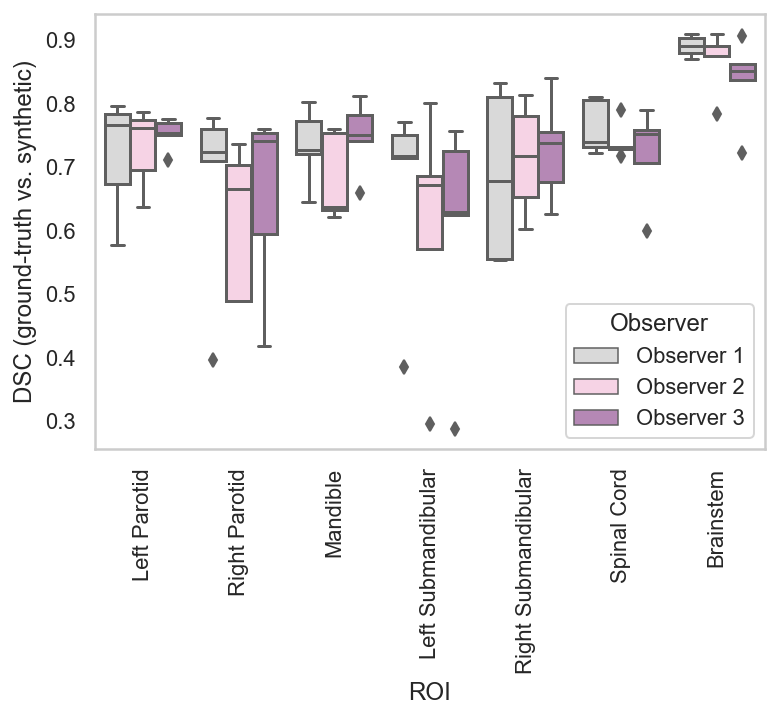

In [253]:
palette_tab10 = sns.color_palette("Set3") # https://stackoverflow.com/questions/66948177/how-can-i-select-a-specific-color-from-matplotlib-colormaps
palette = sns.color_palette([palette_tab10[8], palette_tab10[7], palette_tab10[9]])

g = sns.boxplot(x="ROI", y="DSC", hue="Observer", data=df_metrics_rename[df_metrics_rename["Observer"] != "STAPLE"], palette=palette)
plt.xticks(rotation=90)

labels = ['Left Parotid', 'Right Parotid', 'Mandible', 'Left Submandibular', 'Right Submandibular', 'Spinal Cord', 'Brainstem']
g.set_xticklabels(labels)
g.set(ylabel='DSC (ground-truth vs. synthetic)')

;

''

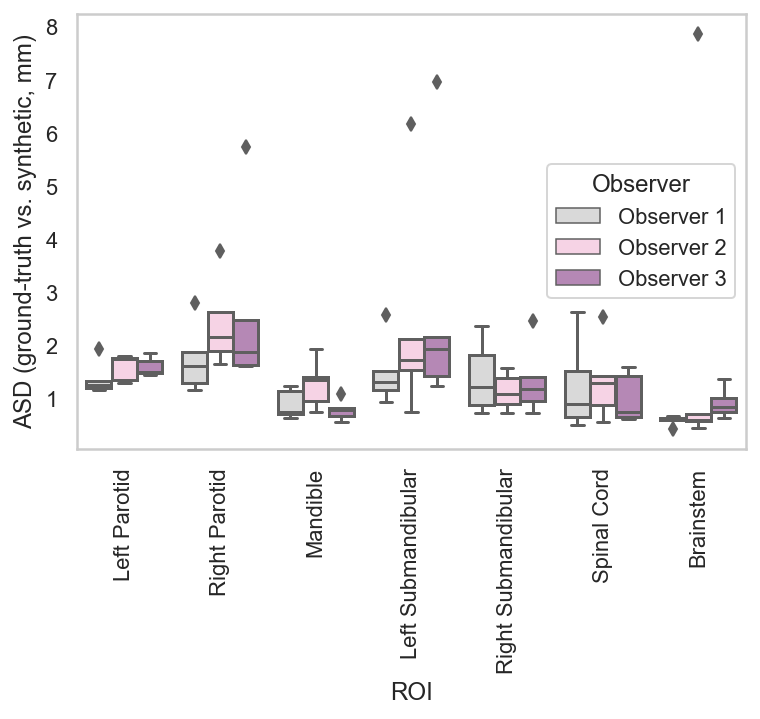

In [254]:
palette_tab10 = sns.color_palette("Set3") # https://stackoverflow.com/questions/66948177/how-can-i-select-a-specific-color-from-matplotlib-colormaps
palette = sns.color_palette([palette_tab10[8], palette_tab10[7], palette_tab10[9]])

g = sns.boxplot(x="ROI", y="ASD", hue="Observer", data=df_metrics_rename[df_metrics_rename["Observer"] != "STAPLE"], palette=palette)
plt.xticks(rotation=90)

labels = ['Left Parotid', 'Right Parotid', 'Mandible', 'Left Submandibular', 'Right Submandibular', 'Spinal Cord', 'Brainstem']
g.set_xticklabels(labels)
g.set(ylabel='ASD (ground-truth vs. synthetic, mm)')

;

In [89]:
df_metrics.groupby(['ROI', 'Observer']).median()

DSC      SDSC      HD95       ASD
ROI            Observer                                        
bone_mandible  STAPLE    0.687831  0.896258  3.385417  0.949511
               de        0.726282  0.962855  2.708333  0.749268
               ma        0.636910  0.881683  7.447916  1.343933
               yk        0.749875  0.944350  3.221620  0.783532
brainstem      STAPLE    0.899749  0.971560  2.141125  0.564009
               de        0.889258  0.965438  2.407159  0.602160
               ma        0.889310  0.966008  2.199997  0.583564
               yk        0.850681  0.938778  3.000585  0.833254
glnd_submand_l STAPLE    0.679984  0.759718  7.647070  1.654152
               de        0.716563  0.830149  6.625540  1.306173
               ma        0.670545  0.761937  7.447916  1.715898
               yk        0.627743  0.756435  9.479166  1.934721
glnd_submand_r STAPLE    0.731190  0.900046  3.559641  1.046981
               de        0.677012  0.875219  6.093750  1.205811
               ma        0.716336  0.891594  4.062500  1.083446
               yk        0.736921  0.858918  5.233916  1.171670
parotid_l      STAPLE    0.751553  0.816496  6.093750  1.450134
               de        0.765038  0.865978  4.417027  1.252748
               ma        0.760887  0.762152  6.093750  1.747857
               yk        0.752125  0.784919  6.378769  1.489294
parotid_r      STAPLE    0.662415  0.718428  7.883224  2.022049
               de        0.722792  0.779063  5.272535  1.608322
               ma        0.664455  0.643757  8.146252  2.148850
               yk        0.740198  0.743147  6.093750  1.864731
spinalcord     STAPLE    0.737185  0.883501  8.828086  1.359657
               de        0.739042  0.944280  4.787702  0.899824
               ma        0.729713  0.896536  8.670897  1.289949
               yk        0.751598  0.974411  2.301832  0.738764

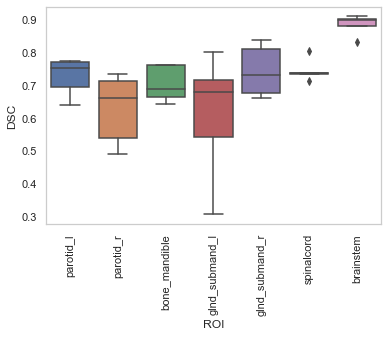

In [87]:
# just STAPLE 
ax = sns.boxplot(x="ROI", y="DSC", data=df_metrics[df_metrics['Observer'] == "STAPLE"])
plt.xticks(rotation=90);

# Interobserver Variability Analysis

In [62]:
import itertools

In [63]:
def pairwise_main(lst): # main function so you don't waste time 
    DSC_list = []
    HD95_list = []
    ASD_list = []
    APL_list = []
    ordered_list = itertools.combinations(lst,2)
    for i in ordered_list:
        file_1 = sitk.ReadImage(i[0])
        file_2 = sitk.ReadImage(i[1])
        
        spacing_mm = file_1.GetSpacing() # need spacing to calcualte distances
        
        mask_1 = sitk.GetArrayFromImage(file_1)
        mask_2 = sitk.GetArrayFromImage(file_2)
        
        DSC = compute_dice_coefficient(mask_1, mask_2)
        DSC_list.append(DSC)
        
        mask_1_bool = mask_1.astype(bool) # need to convert to bool format to work 
        mask_2_bool = mask_2.astype(bool)
        
        surface_distances = compute_surface_distances(mask_1_bool, mask_2_bool, spacing_mm) # need this for all calculations
        HD95 = compute_robust_hausdorff(surface_distances, 95)
        HD95_list.append(HD95)
        
        ASD_truth = compute_average_surface_distance(surface_distances)[0] #  A tuple with two float values: 1. the average distance (in mm) from the ground truth surface to thepredicted surface, 2. the average distance from the predicted surface to the ground truth surface.
        ASD_pred = compute_average_surface_distance(surface_distances)[1]
        ASD_mean = (ASD_truth + ASD_pred)/2
        ASD_list.append(ASD_mean)
    
        
    return DSC_list, HD95_list, ASD_list


In [65]:
%%time 

nifti_path = "C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti"


ROI_list = ['parotid_l', 'parotid_r', 'bone_mandible', 'glnd_submand_l', 'glnd_submand_r', 'spinalcord', 'brainstem'] # just two parotids for now 

observer_list = ['de', 'ma', 'yk']

image_list = ['real', 'synthetic']

df_IOV = pd.DataFrame(columns=['MRN', 'ROI', 'Image', 'DSC_list', 'HD95_list', 'ASD_list'])
counter = -1  


MRN_paths = [os.path.join(nifti_path, folder) for folder in os.listdir(nifti_path)]

for MRN_path in MRN_paths:
    print(MRN_path)
    
    MRN = os.path.split(MRN_path)[-1]
    
    for ROI in ROI_list:
        print(ROI)
        
        for image in image_list:
            print(image)
        
            file_path_list = [os.path.join(MRN_path, file) for file in os.listdir(MRN_path) if image in file and ROI in file]
            
            print(file_path_list)
            
            DSC_list, HD95_list, ASD_list = pairwise_main(file_path_list)
            
            counter +=1
            df_IOV.loc[counter] = [MRN, ROI, image, DSC_list, HD95_list, ASD_list]
            

C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\1389864037
parotid_l
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_real_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_real_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_real_yk.nii.gz']
synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_synthetic_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_l_synthetic_yk.nii.gz']
parotid_r
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\1389864037\\parotid_r_real_de.nii.gz', 'C

synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\glnd_submand_l_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\glnd_submand_l_synthetic_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\glnd_submand_l_synthetic_yk.nii.gz']
glnd_submand_r
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\glnd_submand_r_real_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\glnd_submand_r_real_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\glnd_submand_r_real_yk.nii.gz']
synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\2589026023\\glnd_submand_r_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anon

C:\Users\kawahid\Desktop\Synthetic_MR\Anonymized\manual_segmentation_nifti\3376859407
parotid_l
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\parotid_l_real_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\parotid_l_real_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\parotid_l_real_yk.nii.gz']
synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\parotid_l_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\parotid_l_synthetic_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\parotid_l_synthetic_yk.nii.gz']
parotid_r
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3376859407\\parotid_r_real_de.nii.gz', 'C

synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_l_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_l_synthetic_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_l_synthetic_yk.nii.gz']
glnd_submand_r
real
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_r_real_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_r_real_ma.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_r_real_yk.nii.gz']
synthetic
['C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anonymized\\manual_segmentation_nifti\\3641355426\\glnd_submand_r_synthetic_de.nii.gz', 'C:\\Users\\kawahid\\Desktop\\Synthetic_MR\\Anon

In [66]:
df_IOV

,MRN,ROI,Image,DSC_list,HD95_list,ASD_list
0,1389864037,parotid_l,real,"[0.571262603211485, 0.6403175698998964, 0.6566...","[15.529480923342172, 8.827676062673593, 8.1904...","[3.0684970083690635, 2.0062317068741846, 2.065..."
1,1389864037,parotid_l,synthetic,"[0.5987916759901544, 0.4071133940384466, 0.685...","[13.87343231524607, 13.697117098255953, 5.9184...","[2.2837266436091275, 3.430691515400216, 1.3927..."
2,1389864037,parotid_r,real,"[0.726522351633961, 0.6334942443371704, 0.6314...","[8.64487839473939, 6.634630431595067, 9.041763...","[1.6973318054618471, 1.9250709118449474, 2.318..."
3,1389864037,parotid_r,synthetic,"[0.6625026317636326, 0.35840241145440843, 0.55...","[13.71231699515995, 16.069289115581743, 6.1486...","[2.004487725029654, 4.0239075379845906, 2.0178..."
4,1389864037,bone_mandible,real,"[0.6270937336782908, 0.7096744514130618, 0.591...","[12.55353934422272, 9.683888597387842, 27.8346...","[1.764450064385216, 0.939732498391286, 3.16753..."
5,1389864037,bone_mandible,synthetic,"[0.892353579175705, 0.6561005017307767, 0.6765...","[1.666666030883789, 14.287712903392205, 14.287...","[0.21753642899278727, 1.3140344971002604, 1.26..."
6,1389864037,glnd_submand_l,real,"[0.7894312377587465, 0.7751156240219773, 0.827...","[3.6462052311703754, 3.452461027686699, 2.1411...","[0.7526987657765789, 0.8984617308091296, 0.554..."
7,1389864037,glnd_submand_l,synthetic,"[0.5997277059223962, 0.6014518288815279, 0.718...","[8.927171259373118, 8.434384113684505, 5.67890...","[2.023896333509196, 1.7155576305921532, 1.1465..."
8,1389864037,glnd_submand_r,real,"[0.8411560875728461, 0.7552141201866608, 0.738...","[2.0312499403953552, 4.0624998807907104, 5.050...","[0.48221226262223515, 1.0016877478648953, 1.09..."
9,1389864037,glnd_submand_r,synthetic,"[0.8894849198095134, 0.7429824998753553, 0.818...","[4.999998092651367, 4.166665077209473, 3.11359...","[0.5931661337893073, 1.1549852393334281, 0.803..."


In [67]:
# FIRST NEED TO GENERATE EXPLODED DATAFRAME

df_IOV_explode = df_IOV.explode(['DSC_list', 'HD95_list', 'ASD_list'])

In [68]:
df_IOV_explode

,MRN,ROI,Image,DSC_list,HD95_list,ASD_list
0,1389864037,parotid_l,real,0.571263,15.529481,3.068497
0,1389864037,parotid_l,real,0.640318,8.827676,2.006232
0,1389864037,parotid_l,real,0.656686,8.190442,2.065296
1,1389864037,parotid_l,synthetic,0.598792,13.873432,2.283727
1,1389864037,parotid_l,synthetic,0.407113,13.697117,3.430692
1,1389864037,parotid_l,synthetic,0.685129,5.918425,1.392705
2,1389864037,parotid_r,real,0.726522,8.644878,1.697332
2,1389864037,parotid_r,real,0.633494,6.63463,1.925071
2,1389864037,parotid_r,real,0.631478,9.041763,2.318469
3,1389864037,parotid_r,synthetic,0.662503,13.712317,2.004488


In [72]:
df_IOV_explode['DSC_list']=df_IOV_explode['DSC_list'].astype('float64') # need this for violinplot for some reason
df_IOV_explode['ASD_list']=df_IOV_explode['ASD_list'].astype('float64')

In [73]:
df_IOV_explode.groupby(['ROI', 'Image']).median()

DSC_list  ASD_list
ROI            Image                        
bone_mandible  real       0.692707  1.427032
               synthetic  0.686205  1.314034
brainstem      real       0.886601  0.548618
               synthetic  0.912687  0.667743
glnd_submand_l real       0.827573  0.641452
               synthetic  0.803808  0.988121
glnd_submand_r real       0.842032  0.679590
               synthetic  0.799336  1.265181
parotid_l      real       0.662384  2.065296
               synthetic  0.649639  2.476143
parotid_r      real       0.690834  1.925071
               synthetic  0.679835  2.034191
spinalcord     real       0.762484  1.229580
               synthetic  0.772988  0.905396

In [258]:
df_IOV_explode_rename = df_IOV_explode.copy()
df_IOV_explode_rename['Image'] = df_IOV_explode_rename['Image'].str.replace('real','Ground-truth')
df_IOV_explode_rename['Image'] = df_IOV_explode_rename['Image'].str.replace('synthetic','Synthetic')

In [259]:
from statannotations.Annotator import Annotator

DSC_list
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

parotid_r_real vs. parotid_r_synthetic: Mann-Whitney-Wilcoxon test two-sided, P_val:6.187e-01 U_stat=1.250e+02
parotid_l_real vs. parotid_l_synthetic: Mann-Whitney-Wilcoxon test two-sided, P_val:2.998e-01 U_stat=1.380e+02
bone_mandible_real vs. bone_mandible_synthetic: Mann-Whitney-Wilcoxon test two-sided, P_val:5.338e-01 U_stat=9.700e+01
glnd_submand_l_real vs. glnd_submand_l_synthetic: Mann-Whitney-Wilcoxon test two-sided, P_val:5.897e-01 U_stat=1.260e+02
glnd_submand_r_real vs. glnd_submand_r_synthetic: Mann-Whitney-Wilcoxon test two-sided, P_val:2.455e-01 U_stat=1.410e+02
spinalcord_real vs. spinalcord_synthetic: Mann-Whitney-Wilcoxon test two-sided, P_val:5.897e-01 U_stat=9.900e+01
brainstem_real vs. brainstem_synthetic: Mann-Whitney-Wilcoxon test two-sided, P_val:1.150e-01 U_stat=7.400e+01
ASD

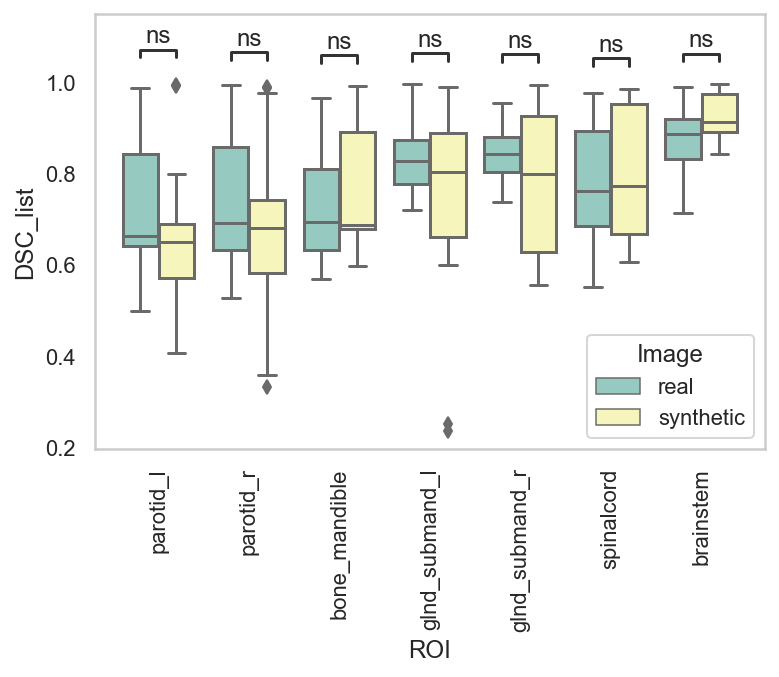

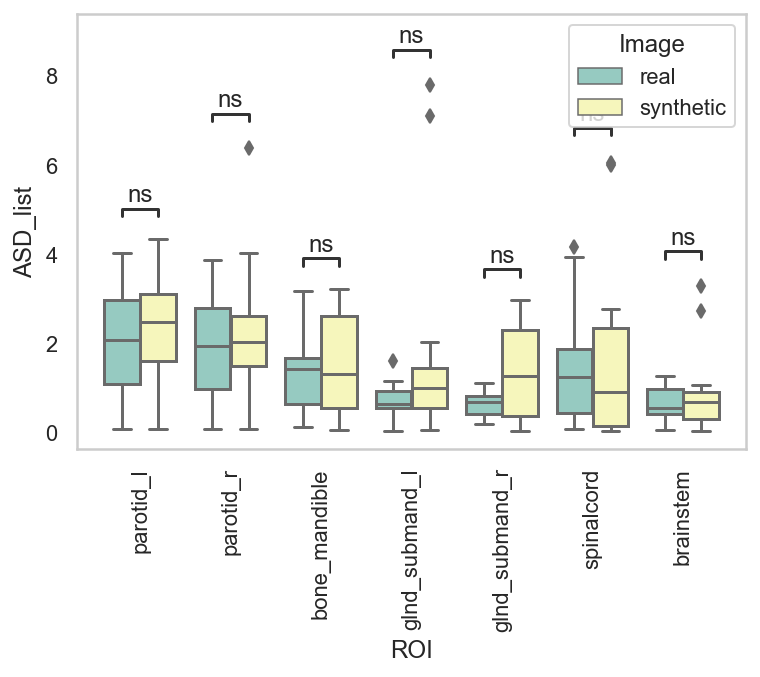

<Figure size 432x288 with 0 Axes>

In [260]:
x="ROI" 

hue="Image"
hue_order = ['real', 'synthetic']

y_list = ["DSC_list", "ASD_list"] # iterate 

for y in y_list:
    print(y)

    ax = sns.boxplot(x=x, y=y, hue=hue,
                     data=df_IOV_explode,
                       hue_order = hue_order,
                        palette="Set3"
                       )

    ROI_list = ['parotid_l', 'parotid_r', 'bone_mandible', 'glnd_submand_l', 'glnd_submand_r', 'spinalcord', 'brainstem'] # just two parotids for now 
    class_list = ['real', 'synthetic']

    pairs = [tuple((ROI, classes) for classes in class_list) for ROI in ROI_list] # original

    # all combos, in theory reduces down to code above in 2-class example
    combination_list = list(itertools.combinations(class_list, 2))
    pairs = [tuple((ROI, classes) for classes in subclass_list) for subclass_list in combination_list for ROI in ROI_list]

    annot = Annotator(ax, pairs, data=df_IOV_explode, x=x, y=y, hue=hue, hue_order=hue_order)

    annot.new_plot(ax, pairs, data=df_IOV_explode, x=x, y=y, hue=hue, hue_order=hue_order)
    annot.configure(test='Mann-Whitney', verbose=2)
    annot.apply_test()
    annot.annotate()
    
    """
    # TG-263 names 
    labels = ['BrachialPlex_L','CTV_Ax','CTV_Chestwall','CTV_IMN','CTV_Sclav_LN','Heart', 'A_LAD_L']
    ax.set_xticklabels(labels)

    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel(y.split('_')[0])
    plt.title('Breast')
    
    """
    
    plt.xticks(rotation=90)
    plt.figure()

DSC_list
ASD_list


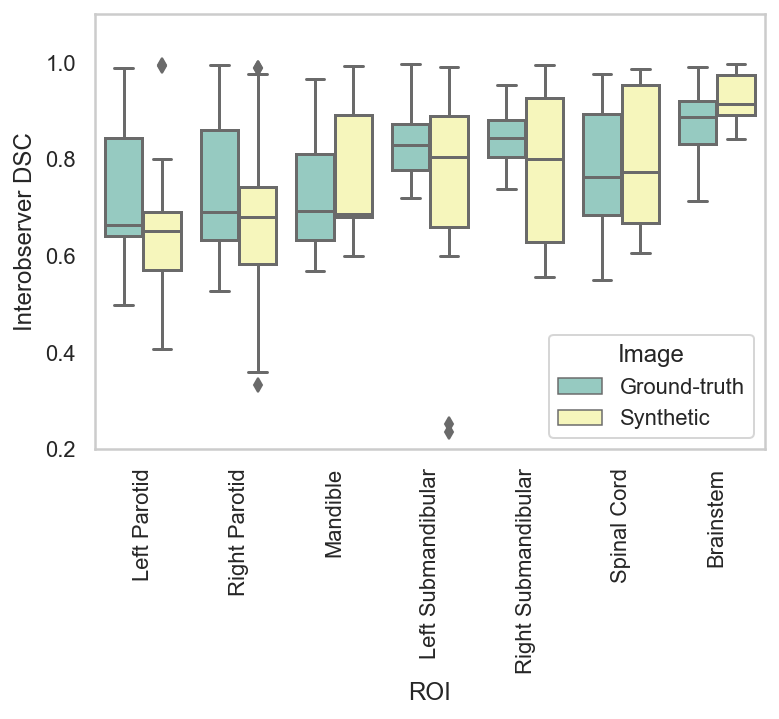

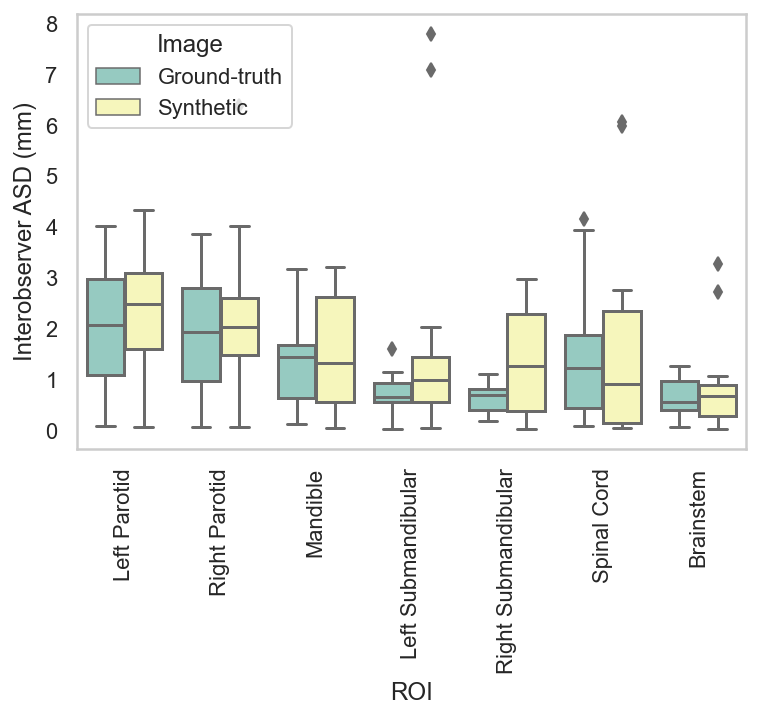

<Figure size 432x288 with 0 Axes>

In [267]:
x="ROI" 

hue="Image"
hue_order = ['Ground-truth', 'Synthetic']

y_list = ["DSC_list", "ASD_list"] # iterate 

for y in y_list:
    print(y)

    ax = sns.boxplot(x=x, y=y, hue=hue,
                     data=df_IOV_explode_rename,
                       hue_order = hue_order,
                        palette="Set3"
                       )
     
    plt.xticks(rotation=90)
    labels = ['Left Parotid', 'Right Parotid', 'Mandible', 'Left Submandibular', 'Right Submandibular', 'Spinal Cord', 'Brainstem']
    ax.set_xticklabels(labels)
    if y == "DSC_list":
        plt.gca().set_ylim([0.2, 1.1])
        ax.set(ylabel='Interobserver DSC')
    elif y == "ASD_list":
        ax.set(ylabel='Interobserver ASD (mm)')
    plt.figure()

Have the above but if want it to be consistent with the other tests we've done I would stick to some kind of TOST.

Can use IQR of IOV as thresholds here.

In [112]:
from statsmodels.stats.weightstats import ttost_paired, ttost_ind

In [99]:
df_IOV_explode.groupby(['ROI', 'Image']).median()

DSC_list  ASD_list
ROI            Image                        
bone_mandible  real       0.692707  1.427032
               synthetic  0.686205  1.314034
brainstem      real       0.886601  0.548618
               synthetic  0.912687  0.667743
glnd_submand_l real       0.827573  0.641452
               synthetic  0.803808  0.988121
glnd_submand_r real       0.842032  0.679590
               synthetic  0.799336  1.265181
parotid_l      real       0.662384  2.065296
               synthetic  0.649639  2.476143
parotid_r      real       0.690834  1.925071
               synthetic  0.679835  2.034191
spinalcord     real       0.762484  1.229580
               synthetic  0.772988  0.905396

In [100]:
df_IOV_explode.groupby(['ROI', 'Image']).quantile(0.75) - df_IOV_explode.groupby(['ROI', 'Image']).quantile(0.25)

C:\Users\kawahid\AppData\Local\Temp/ipykernel_24720/3582414564.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_IOV_explode.groupby(['ROI', 'Image']).quantile(0.75) - df_IOV_explode.groupby(['ROI', 'Image']).quantile(0.25)


DSC_list  ASD_list
ROI            Image                        
bone_mandible  real       0.178160  1.035191
               synthetic  0.212082  2.065616
brainstem      real       0.088997  0.567925
               synthetic  0.083144  0.609970
glnd_submand_l real       0.094865  0.377457
               synthetic  0.229667  0.888335
glnd_submand_r real       0.076683  0.410198
               synthetic  0.298084  1.912914
parotid_l      real       0.202916  1.876113
               synthetic  0.119061  1.499677
parotid_r      real       0.226155  1.826994
               synthetic  0.159327  1.123526
spinalcord     real       0.208247  1.430116
               synthetic  0.284330  2.212484

In [255]:
l_parotid_IQR_DSC = 0.202916
r_parotid_IQR_DSC = 0.226155
mandible_IQR_DSC = 0.178160
r_submand_IQR_DSC = 0.076683
l_submand_IQR_DSC = 0.094865
brainstem_IQR_DSC = 0.083144
spinalcord_IQR_DSC = 0.208247

l_parotid_IQR_ASD = 1.876113
r_parotid_IQR_ASD = 1.826994
mandible_IQR_ASD = 1.035191
r_submand_IQR_ASD = 0.410198
l_submand_IQR_ASD = 0.377457
brainstem_IQR_ASD = 0.609970
spinalcord_IQR_ASD = 1.430116

In [256]:
IQR_dict = {"parotid_l": {"DSC": l_parotid_IQR_DSC, "ASD": l_parotid_IQR_ASD},
            "parotid_r": {"DSC": r_parotid_IQR_DSC, "ASD": r_parotid_IQR_ASD},
            "bone_mandible": {"DSC": mandible_IQR_DSC, "ASD": mandible_IQR_ASD},
            "glnd_submand_l": {"DSC": l_submand_IQR_DSC, "ASD": l_submand_IQR_ASD},
            "glnd_submand_r": {"DSC": r_submand_IQR_DSC, "ASD": r_submand_IQR_ASD},
            "spinalcord": {"DSC": spinalcord_IQR_DSC, "ASD": spinalcord_IQR_ASD},
            "brainstem": {"DSC": brainstem_IQR_DSC, "ASD": brainstem_IQR_ASD},
           }

In [257]:
ROI_list = ['parotid_l', 'parotid_r', 'bone_mandible', 'glnd_submand_l', 'glnd_submand_r', 'spinalcord', 'brainstem'] # just two parotids for now 

metric_list = ["DSC_list", "ASD_list"]

for ROI in ROI_list:
    print(ROI)
    for metric in metric_list:
        metric_name = metric.split('_')[0]
        print(metric_name)
        
        thresh = IQR_dict[ROI][metric_name]
        print(thresh)
        
        original_list = df_IOV_explode[(df_IOV_explode["Image"]=="real") & (df_IOV_explode["ROI"]==ROI)][metric]
        synthetic_list = df_IOV_explode[(df_IOV_explode["Image"]=="synthetic") & (df_IOV_explode["ROI"]==ROI)][metric]
        
        print(ttost_paired(original_list.values, synthetic_list.values, low= -thresh, upp= thresh))

parotid_l
DSC
0.202916
(6.441811305548147e-05, (10.513944808092536, 2.5019065584605174e-08, 14.0), (-5.223897040195895, 6.441811305548147e-05, 14.0))
ASD
1.876113
(3.683021658350615e-06, (6.896426664782493, 3.683021658350615e-06, 14.0), (-9.691267951473316, 6.878054111885544e-08, 14.0))
parotid_r
DSC
0.226155
(0.007264873359141955, (4.6622031716179215, 0.00018325169239685957, 14.0), (-2.787628510730077, 0.007264873359141955, 14.0))
ASD
1.826994
(0.0042620414752917515, (3.0573773206670394, 0.0042620414752917515, 14.0), (-3.9917147651385547, 0.0006688046378376296, 14.0))
bone_mandible
DSC
0.17816
(0.0010139037573644782, (3.7804005026803855, 0.0010139037573644782, 14.0), (-5.609407541470731, 3.219059603574421e-05, 14.0))
ASD
1.035191
(0.007175226941393683, (2.7939396851389153, 0.007175226941393683, 14.0), (-4.069128858607664, 0.0005747127125177282, 14.0))
glnd_submand_l
DSC
0.094865
(0.49367431941471657, (3.2184958075445116, 0.0030943210086481435, 14.0), (-0.016142325642133425, 0.49367431